In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls
import os
os.chdir("drive/My Drive/Diplomski rad/")
!ls

drive  sample_data
data  docs  pooling  slow-fast	tb.ipynb


In [3]:
os.chdir("data/")

In [4]:
from new_generator import FrameGenerator
import glob
import os
os.chdir("./Videos/")
classes = [i.split(os.path.sep)[1] for i in glob.glob('test/*')]
classes.sort()
print(len(classes))
SIZE = (224, 224)
CHANNELS = 3
NBFRAME = 10
BS = 4
EPOCHS = 5


glob_pattern='test/{classname}/*.avi'

test = FrameGenerator(
    BS,
    NBFRAME,
    classes, 
    SIZE,
    None,
    CHANNELS,
    glob_pattern,
    None,
    typ="test"
)

Using TensorFlow backend.


101
Loaded 44 test files for class ApplyEyeMakeup .
Loaded 32 test files for class ApplyLipstick .
Loaded 41 test files for class Archery .
Loaded 35 test files for class BabyCrawling .
Loaded 31 test files for class BalanceBeam .
Loaded 43 test files for class BandMarching .
Loaded 43 test files for class BaseballPitch .
Loaded 35 test files for class Basketball .
Loaded 37 test files for class BasketballDunk .
Loaded 48 test files for class BenchPress .
Loaded 38 test files for class Biking .
Loaded 40 test files for class Billiards .
Loaded 38 test files for class BlowDryHair .
Loaded 33 test files for class BlowingCandles .
Loaded 30 test files for class BodyWeightSquats .
Loaded 43 test files for class Bowling .
Loaded 49 test files for class BoxingPunchingBag .
Loaded 37 test files for class BoxingSpeedBag .
Loaded 28 test files for class BreastStroke .
Loaded 36 test files for class BrushingTeeth .
Loaded 33 test files for class CleanAndJerk .
Loaded 39 test files for class Clif

In [5]:
import tensorflow
from tensorflow.keras.models import load_model

model = load_model("../../pooling/mobilenetv2-10frames/")
print("Model loaded.")

Model loaded.


In [12]:
import numpy as np

v,f,l = test.get_random_sample()
print(f.shape)
pred=model.predict_proba(np.array([f]))
print(np.argmax(pred), test.get_class_name(np.argmax(pred)))
print(np.max(pred))
print("Actual",np.argmax(l), test.get_class_name(np.argmax(l)))

(32, 224, 224, 3)
22 CricketBowling
0.518193
Actual 22 CricketBowling


In [33]:
print(pred)#37.5
print(np.sort(pred))
print(test.get_class_name(16))

[[1.5170825e-02 6.7155939e-05 1.2070991e-03 4.1416213e-03 2.1613218e-04
  6.9666828e-04 2.1805563e-05 5.1039529e-05 8.1605132e-05 3.1120779e-03
  7.7475497e-04 5.6835252e-04 8.3709334e-04 1.1262931e-03 6.6705013e-04
  2.3421794e-03 1.1288507e-04 2.4984377e-03 2.3078868e-04 1.7817451e-04
  3.4474098e-05 2.2160639e-01 2.7314282e-03 3.5159036e-03 1.5690643e-03
  1.2263069e-03 5.6712131e-04 3.7096830e-05 1.3137321e-04 1.4720743e-03
  2.9197944e-04 8.1428373e-03 5.1314793e-05 1.3858808e-02 1.2094324e-05
  3.5204467e-01 6.4800405e-03 1.6646521e-02 1.0975292e-02 1.3228222e-04
  3.8906204e-04 7.5297890e-04 6.2168998e-05 8.9949208e-05 3.2961329e-05
  8.9836941e-04 3.2539840e-05 1.4349237e-03 3.4027703e-03 3.3503760e-02
  5.8273305e-03 2.3510235e-03 2.1424786e-04 9.4944065e-05 2.3564131e-03
  4.2101913e-04 1.5857018e-04 1.3057892e-04 9.3815746e-03 1.7592844e-04
  2.1117735e-03 2.1269807e-04 7.7162338e-05 1.2445166e-03 4.8457109e-04
  7.2361458e-05 2.4384652e-04 1.4795025e-04 1.4536218e-04 3.8061

In [8]:
def draw_video(frames, to_draw, text):
  import matplotlib.pyplot as plt
  import math
  
  draw = frames[::math.floor(len(frames)/float(to_draw))][:to_draw]
  fig, axs = plt.subplots(1,to_draw, figsize=(15,15))
  for i in range(to_draw):
    axs[i].imshow(draw[i])
    axs[i].axis('off')
  plt.show()

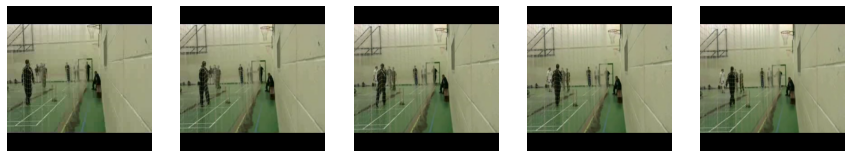

In [13]:
draw_video(f,5, 'bla')

In [6]:
model.compile(metrics=["accuracy",tensorflow.keras.metrics.TopKCategoricalAccuracy(k=3)])
result = model.evaluate(test,steps=len(test),batch_size=BS)
print(result)

945/945 [==============================] - 5023s 5s/step - loss: 0.4941 - accuracy: 0.6860 - top_k_categorical_accuracy: 0.8085
[0.49407175183296204, 0.6859788298606873, 0.8084656000137329]
